In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets

2024-03-15 00:58:43.118262: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 00:58:43.120296: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-15 00:58:43.148931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 00:58:43.674975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
diabetes = datasets.load_diabetes()

In [13]:
features = diabetes['feature_names']
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [15]:
# Check for missing values
missing_values = np.sum(pd.isnull(diabetes.data))
print("Missing values:", missing_values)

# Identify categorical variables
categorical_variables = []
for i in range(diabetes.data.shape[1]):
    if len(np.unique(diabetes.data[:, i])) < 5:
        categorical_variables.append(i)
print("Categorical variables:", categorical_variables)

# Check for normally distributed variables
normal_variables = []
for i in range(diabetes.data.shape[1]):
    if np.abs(np.mean(diabetes.data[:, i]) - np.median(diabetes.data[:, i])) < 1:
        normal_variables.append(i)
print("Normally distributed variables:", normal_variables)

# Show descriptive statistics
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
print(df.describe())


Missing values: 0
Categorical variables: [1]
Normally distributed variables: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.7

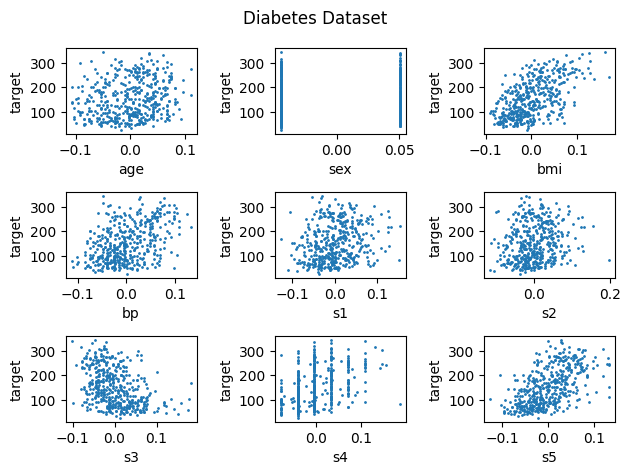

In [16]:
diabetes = datasets.load_diabetes(as_frame=True)

fig, axs = plt.subplots(3, 3)
fig.suptitle('Diabetes Dataset')
for i in range(3):
    for j in range(3):
        n = j + i * 3
        feature = features[n]
        axs[i, j].scatter(diabetes['data'][feature], diabetes['target'], s=1)
        axs[i, j].set_xlabel(feature)
        axs[i, j].set_ylabel('target')
plt.tight_layout()
plt.show()